## Historia




Tema: Diferenças de renda na grande são paulo

Importar dados SP

Separar dados da metropole

Grafico comparando municipios por renda & nota total

grafico scatter demonstrando desigualdade com dados totais

grafico de barras comparando renda media por municipio

Separar pessoas que de enquadram no caso de não poderem refazer a prova porém casos socio/economicos a impediram como:
não ter carro faltarem em 1 dos dias e ter renda menor que a média,
 
gerar as notas faltantes com machine learning, sendo o valor das notas a geradas subraida pelo desvio padrão 

Separar Graficos

Escrever Conclusão utilizando graficos como base

Ver live sobre Story Telling

ir comentando o codigo conforme construo

Extra: Escrever historia estilo RPG sendo a conclusão o FINAL BOSS

## Importando

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 13.8MB/s 
     |████████████████████████████████| 14.8MB 312kB/s 


In [ ]:
import json
import numpy as np
import sys
np.random.seed(0) # set a seed to enable reproducable results
import pandas as pd
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns

## Base dados amostra


In [ ]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados_amostra = pd.read_csv(fonte)
dados_amostra.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados_amostra.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
# interesse = ['NU_INCRICAO','CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','NU_IDADE','TP_SEXO','COR_RACA','IN_TREINEIRO']
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [ ]:
dados_amostra['NOTA_TOTAL'] = dados_amostra[notas].sum(axis=1)
dados_amostra_sem_zero = dados_amostra.query('NOTA_TOTAL != 0')

In [ ]:
sp = dados_amostra_sem_zero.query('SG_UF_RESIDENCIA == "SP"')

In [ ]:
dados_amostra['NOTA_TOTAL'] = dados_amostra[notas].sum(axis=1)
dados_amostra_sem_zero = dados_amostra.query('NOTA_TOTAL != 0')

In [ ]:
sp = dados_amostra_sem_zero.query('SG_UF_RESIDENCIA == "SP"')

In [ ]:
# interesse = ['NU_INCRICAO','CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','NU_IDADE','TP_SEXO','COR_RACA','IN_TREINEIRO']
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [ ]:
sp['NOTA_TOTAL'] = sp[notas].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
todos_municipios_sp1 = sp['NO_MUNICIPIO_RESIDENCIA'].unique()
lista_municipios1 = ['Novo Horizonte', 'Mairinque', 'São Paulo', 'Bananal',
       'Itaquaquecetuba', 'Porto Ferreira', 'Tarumã', 'Guarulhos',
       'Arujá', 'Palmares Paulista', 'Campinas', 'Osasco',]
lista_municipios = ['São Paulo',
'Guarulhos',
'São Bernardo do Campo',
'Santo André',
'Osasco',
'Mauá',
'Mogi das Cruzes',
'Diadema',
'Carapicuíba',
'Itaquaquecetuba',
'Suzano',
'Taboão da Serra',
'Barueri',
'Embu das Artes',
'Cotia',
'Itapevi',
'Ferraz de Vasconcelos',
'Francisco Morato',
'Itapecerica da Serra',
'São Caetano do Sul',
'Franco da Rocha',
'Santana de Parnaíba',
'Jandira',
'Ribeirão Pires',
'Poá',
'Caieiras',
'Mairiporã',
'Arujá',
'Cajamar',
'Embu-Guaçu',
'Santa Isabel',
'Vargem Grande Paulista',
'Rio Grande da Serra',
'Biritiba Mirim',
'Juquitiba',
'Guararema',
'Pirapora do Bom Jesus',
'Salesópolis',
'São Lourenço da Serra']

In [ ]:
sp.query(f'NO_MUNICIPIO_RESIDENCIA in {lista_municipios}')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_TOTAL
12953,190001518551,2019,3550308,São Paulo,35,SP,28,M,1,1,1,3304201.0,Resende,33.0,RJ,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBBAD99999BACCCEEDEDAAADDBECDECDDBABBDDAAECBCC...,AAED*EEAECECDDEBADCBCDEABEDDEBCEBAEBDBEAADEEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,160.0,200.0,180.0,140.0,840.0,E,F,D,D,1,J,A,B,B,A,A,B,A,A,A,B,A,A,A,A,A,B,A,B,B,3604.8
14209,190001570062,2019,3550308,São Paulo,35,SP,17,M,1,3,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBDAD99999BACBDBBEEBDADDDBABAECDACBEBCAAADCDDC...,AAEADEEEBEADEBCBAECBBDBBEBCEABBEDEBBDBDCEACBE,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,120.0,120.0,100.0,100.0,540.0,E,E,B,B,2,E,A,C,C,B,A,C,A,B,A,B,A,B,C,B,B,C,B,B,B,2726.3
14210,190001570078,2019,3523107,Itaquaquecetuba,35,SP,22,M,1,3,1,3523107.0,Itaquaquecetuba,35.0,SP,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDBAB99999BDCCCBCAAADCABBCCDAEBBABEDBBCCBDBBBB...,CABBCBDAAECBACCDADEBBCCCABBABCCDCBDBCDECCDDDD,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,40.0,40.0,100.0,0.0,300.0,A,E,C,F,1,C,A,B,B,A,A,B,B,B,B,A,A,A,B,B,A,B,A,B,B,2161.7
14213,190001570128,2019,3550308,São Paulo,35,SP,21,F,1,2,1,3205309.0,Vitória,32.0,ES,2,0,2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ACDADBCBBBBAADCDACECBECDEDDECCBEBDAADEEBD...,DCCCDDECCCBCBEAACCDDECCBBACDCBCCAABBCCCECDBCD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,140.0,120.0,120.0,120.0,620.0,H,B,B,A,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2631.1
14242,190001571393,2019,3550308,São Paulo,35,SP,20,F,1,3,1,3550308.0,São Paulo,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DBACE99999DCEABDDCAEDACECEBCECEAECABABDACDCBBC...,EACDCBEBDABCADCBADBDEDCEDABCEBBCEDABDEBCDDABE,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,120.0,140.0,120.0,140.0,680.0,C,C,C,B,4,D,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,D,B,B,B,2684.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
dicionario = {}
lista_simples = []
for i in lista_municipios:
  var_temp = sp.query(f'NO_MUNICIPIO_RESIDENCIA == "{i}"')
  lista_simples.append(var_temp['NOTA_TOTAL'].mean())

In [ ]:
dicionario = {}
for posi, i in enumerate(lista_municipios):
  var_temp = sp.query(f'NO_MUNICIPIO_RESIDENCIA == "{i}"')
  sujo = var_temp['NOTA_TOTAL'].mean()
  dicionario[i] = f'{sujo:.5f}'

In [ ]:
a,b = dicionario.values(), dicionario.keys()

In [ ]:
teste = pd.DataFrame({})
teste['Nome'] = b
teste['Nota'] = a

In [ ]:
#teste.sort_values('Nota',ascending=False)
teste = teste.sort_values('Nome',ascending=True)

In [ ]:
valores_media = teste['Nota']

In [ ]:
temp01 = sp['Q006']

In [ ]:
valores = ['B', 'A', 'J', 'E', 'C', 'M', 'D', 'I', 'N', 'F', 'H', 'O', 'Q',
       'G', 'K', 'P', 'L']
valores.sort()

In [ ]:
renda_baixa = valores[:6]
renda_media = valores[6:12]
renda_alta = valores[12:]

In [ ]:
dados_metropole = sp.query(f'NO_MUNICIPIO_RESIDENCIA in {lista_municipios_metropolitana}')

In [ ]:
sp_baixa = dados_metropole.query(f'Q006 in {renda_baixa}')

In [ ]:
sp_media = dados_metropole.query(f'Q006 in {renda_media}')

In [ ]:
sp_alta = dados_metropole.query(f'Q006 in {renda_alta}')

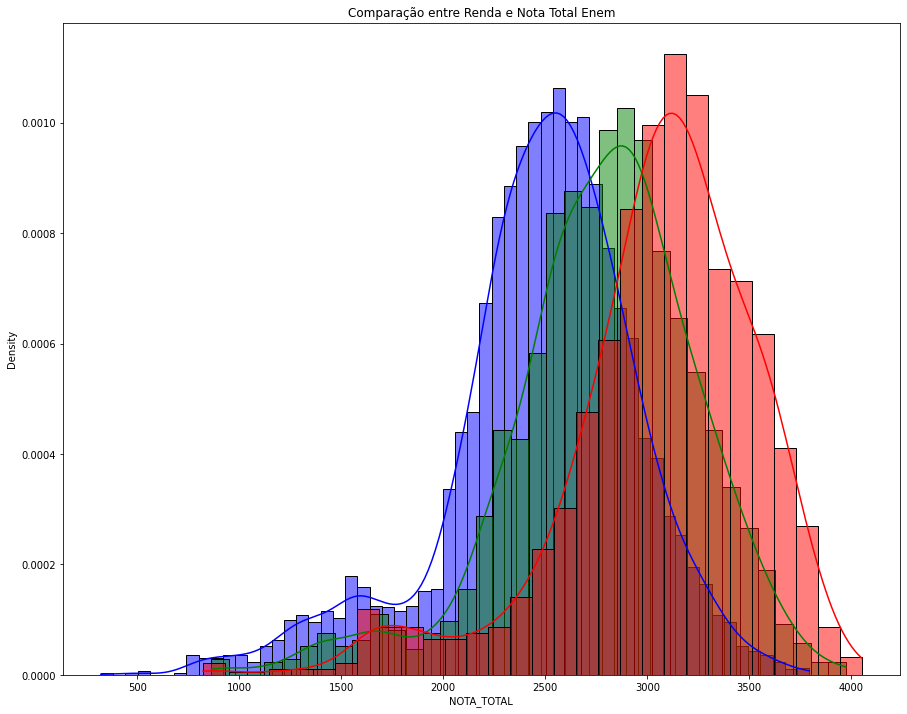

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Comparação entre Renda e Nota Total Enem')
sns.histplot(data=sp_baixa,x='NOTA_TOTAL',kde=True,color='blue',alpha=.5,stat='density')
sns.histplot(data=sp_media,x='NOTA_TOTAL',kde=True,color='green',alpha=.5,stat='density')
sns.histplot(data=sp_alta,x='NOTA_TOTAL',kde=True,color='red',alpha=.5,stat='density')

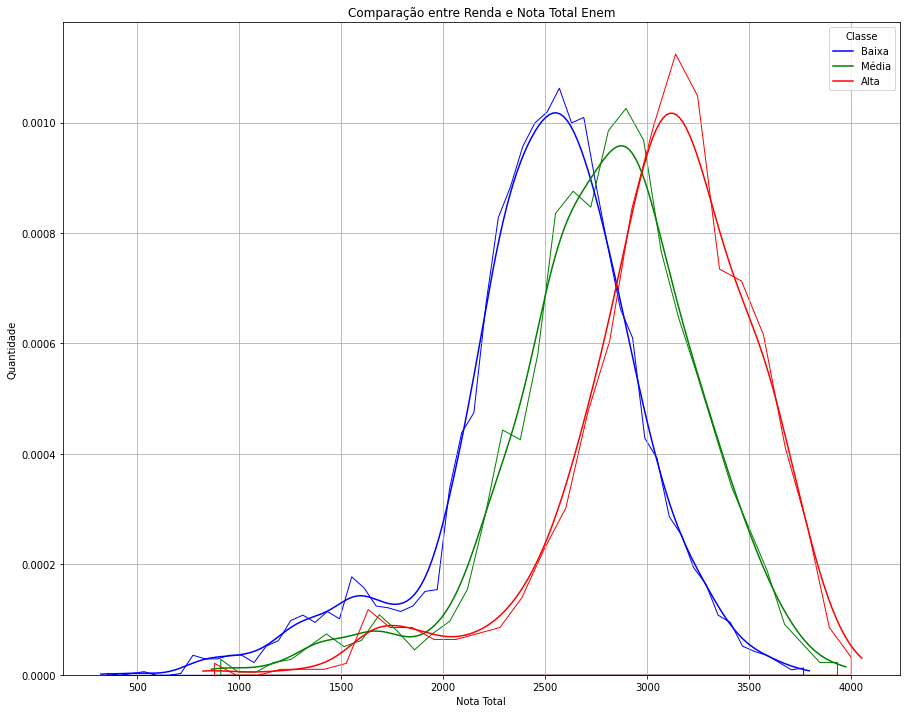

In [ ]:
plt.figure(figsize=(15,12))
plt.grid(b)
plt.title('Comparação entre Renda e Nota Total Enem')
sns.histplot(data=sp_baixa,x='NOTA_TOTAL',kde=True,color='blue',alpha=0,stat='density',element="poly")
sns.histplot(data=sp_media,x='NOTA_TOTAL',kde=True,color='green',alpha=0,stat='density',element="poly")
grafico_diferenca = sns.histplot(data=sp_alta,x='NOTA_TOTAL',kde=True,color='red',alpha=0,stat='density',element="poly")
grafico_diferenca.set_xlabel('Nota Total')
grafico_diferenca.set_ylabel('Quantidade')
grafico_diferenca.legend(labels=('Baixa','Média','Alta'),title='Classe')

In [ ]:
copia_sp = dados_metropole[:]

In [ ]:
renda_baixa

['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
copia_sp['Q006'] = copia_sp['Q006'].replace(renda_baixa,'Renda Baixa')
copia_sp['Q006'] = copia_sp['Q006'].replace(renda_media,'Renda Média')
copia_sp['Q006'] = copia_sp['Q006'].replace(renda_alta,'Renda Alta')

In [ ]:
teste06 = copia_sp.query('Q006 == "Renda Alta"')

In [ ]:
len(teste06)

859

(300.0, 1050.0)

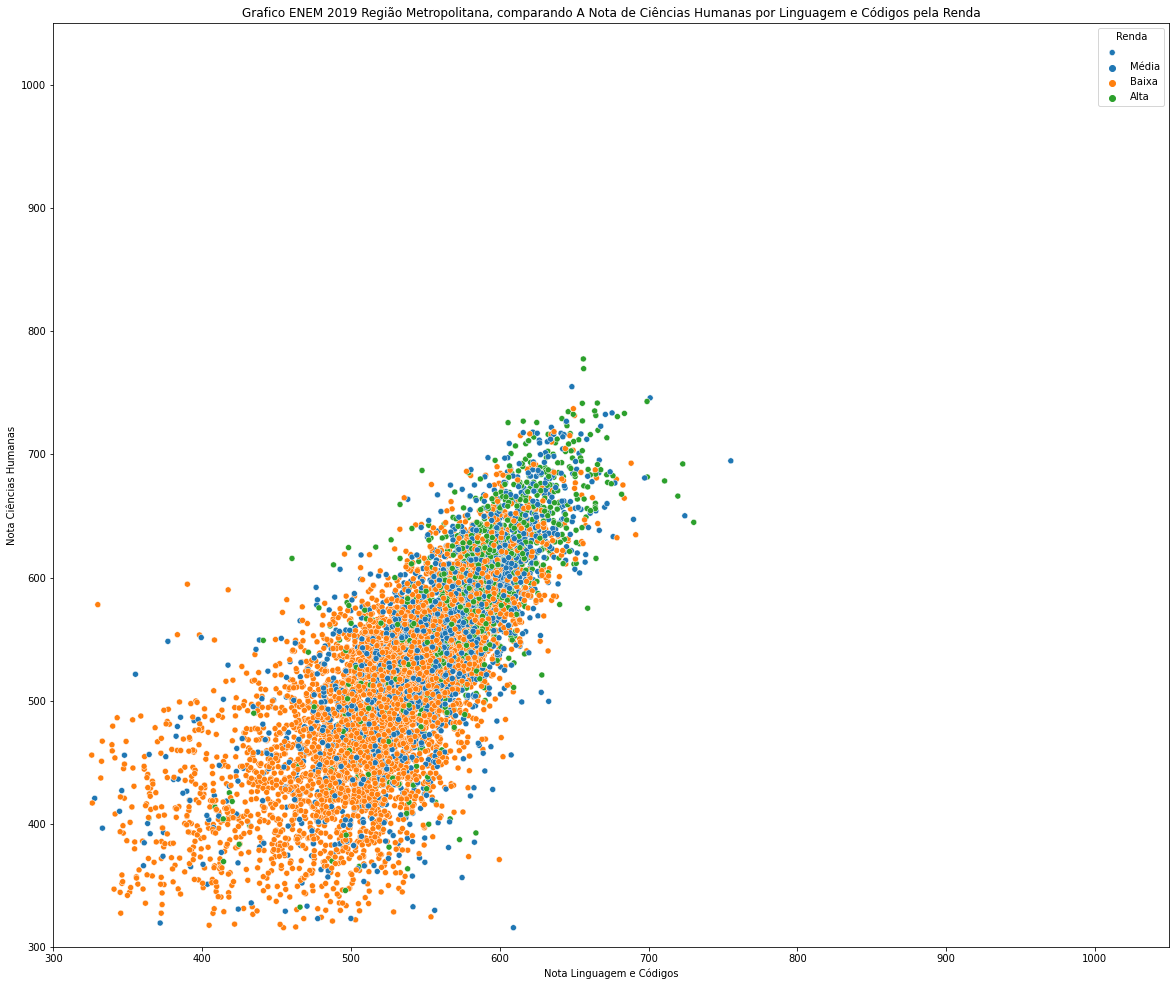

In [ ]:
plt.figure(figsize=(20,17))
plt.title('Grafico ENEM 2019 Região Metropolitana, comparando A Nota de Ciências Humanas por Linguagem e Códigos pela Renda')
grafico_scatter = sns.scatterplot(data=copia_sp,x='NU_NOTA_LC',y='NU_NOTA_CH',hue='Q006')
grafico_scatter.legend(labels=('','Média','Baixa','Alta'),title='Renda')
grafico_scatter.set_xlabel('Nota Linguagem e Códigos')
grafico_scatter.set_ylabel('Nota Ciências Humanas')
plt.ylim(300,1050)
plt.xlim(300,1050)

## IBGE

Fonte IBGE: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15774-malhas.html?edicao=15874&t=downloads

In [ ]:
pip install geopandas

In [ ]:
import json
import numpy as np
import sys
np.random.seed(0) # defina uma seed para ter resultados reproduzidos
import pandas as pd
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sp = gpd.read_file('/content/arquivos/SP_UF_2019.shp')
mesorregioes = gpd.read_file('/content/arquivos/SP_Mesorregioes_2019.shp')
microrregioes = gpd.read_file('/content/arquivos/SP_Microrregioes_2019.shp')
municipios = gpd.read_file('/content/arquivos/SP_Municipios_2019.shp')
imediatas = gpd.read_file('/content/arquivos/SP_RG_Imediatas_2019.shp')
intermediarias = gpd.read_file('/content/arquivos/SP_RG_Intermediarias_2019.shp')

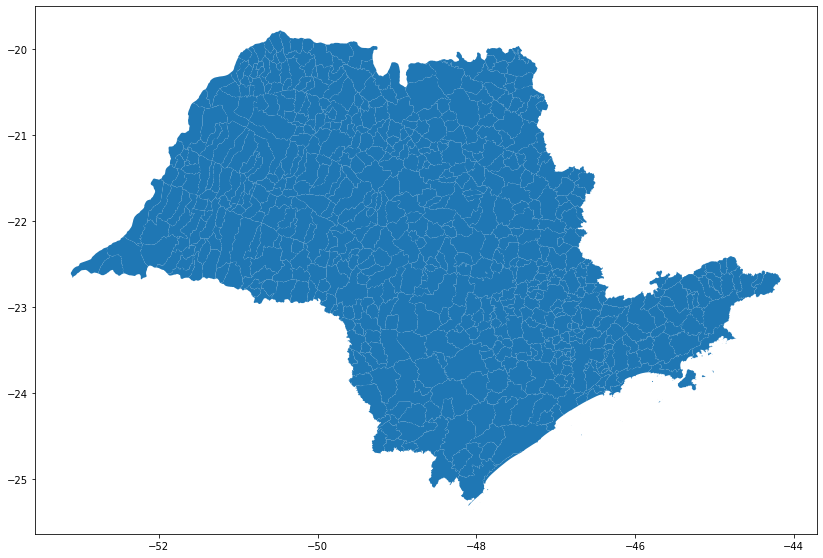

In [ ]:
municipios.plot(figsize=(14,14))

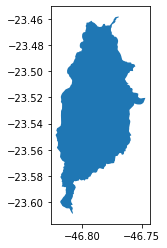

In [ ]:

osasco = municipios.query("NM_MUN == 'Osasco'")
osasco.plot()

In [ ]:
municipios

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.17919 -21.68790, -51.17924 -21.6..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.21948 -22.03920, -47.21784 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73076 -21.94354, -46.73084 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.66057 -22.47957, -46.66064 -22.4..."
...,...,...,...,...,...
640,3557006,Votorantim,SP,183.517,"POLYGON ((-47.50719 -23.54673, -47.50809 -23.5..."
641,3557105,Votuporanga,SP,420.703,"POLYGON ((-50.03205 -20.42645, -50.03200 -20.4..."
642,3557154,Zacarias,SP,319.056,"POLYGON ((-49.98507 -21.05306, -49.98518 -21.0..."
643,3557204,Chavantes,SP,188.727,"POLYGON ((-49.74234 -23.02696, -49.74402 -23.0..."


In [ ]:
lista_municipios_metropolitana = ['São Paulo',
'Guarulhos',
'São Bernardo do Campo',
'Santo André',
'Osasco',
'Mauá',
'Mogi das Cruzes',
'Diadema',
'Carapicuíba',
'Itaquaquecetuba',
'Suzano',
'Taboão da Serra',
'Barueri',
'Embu das Artes',
'Cotia',
'Itapevi',
'Ferraz de Vasconcelos',
'Francisco Morato',
'Itapecerica da Serra',
'São Caetano do Sul',
'Franco da Rocha',
'Santana de Parnaíba',
'Jandira',
'Ribeirão Pires',
'Poá',
'Caieiras',
'Mairiporã',
'Arujá',
'Cajamar',
'Embu-Guaçu',
'Santa Isabel',
'Vargem Grande Paulista',
'Rio Grande da Serra',
'Biritiba Mirim',
'Juquitiba',
'Guararema',
'Pirapora do Bom Jesus',
'Salesópolis',
'São Lourenço da Serra']

lista_municipios_metropolitana.sort()

In [ ]:
number_of_colors = len(lista_municipios_metropolitana)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

In [ ]:
dicionario_cores = {}
for posi, i in enumerate(lista_municipios_metropolitana):
  dicionario_cores[i] = color[posi]


In [ ]:
dicionario_cores

{'Arujá': '#391648',
 'Barueri': '#BC8513',
 'Biritiba Mirim': '#819970',
 'Caieiras': '#D7DC90',
 'Cajamar': '#EB689D',
 'Carapicuíba': '#671950',
 'Cotia': '#334C0E',
 'Diadema': '#0DACCB',
 'Embu das Artes': '#1C32D3',
 'Embu-Guaçu': '#642F14',
 'Ferraz de Vasconcelos': '#0A53D1',
 'Francisco Morato': '#185CA7',
 'Franco da Rocha': '#97D9EA',
 'Guararema': '#739255',
 'Guarulhos': '#2C007A',
 'Itapecerica da Serra': '#94623C',
 'Itapevi': '#B3D9DB',
 'Itaquaquecetuba': '#B56E39',
 'Jandira': '#192F18',
 'Juquitiba': '#27F38A',
 'Mairiporã': '#FA7AE8',
 'Mauá': '#CEDB32',
 'Mogi das Cruzes': '#A17AFC',
 'Osasco': '#676E35',
 'Pirapora do Bom Jesus': '#E0F758',
 'Poá': '#7B9E98',
 'Ribeirão Pires': '#67D425',
 'Rio Grande da Serra': '#E41620',
 'Salesópolis': '#4E8C9B',
 'Santa Isabel': '#615D5A',
 'Santana de Parnaíba': '#399E74',
 'Santo André': '#E2742A',
 'Suzano': '#945ED4',
 'São Bernardo do Campo': '#97F068',
 'São Caetano do Sul': '#DF74BC',
 'São Lourenço da Serra': '#A3FB14'

In [ ]:
regiao_metropolitana = municipios.query(f"NM_MUN in {lista_municipios_metropolitana}")

In [ ]:
regiao_metropolitana['cores'] = dicionario_cores

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
regiao_metropolitana['cores']

44                      Arujá
64                    Barueri
74             Biritiba Mirim
101                  Caieiras
103                   Cajamar
121               Carapicuíba
144                     Cotia
152                   Diadema
167            Embu das Artes
168                Embu-Guaçu
180     Ferraz de Vasconcelos
186          Francisco Morato
187           Franco da Rocha
207                 Guararema
212                 Guarulhos
254      Itapecerica da Serra
257                   Itapevi
264           Itaquaquecetuba
283                   Jandira
296                 Juquitiba
320                 Mairiporã
330                      Mauá
343           Mogi das Cruzes
387                    Osasco
437     Pirapora do Bom Jesus
444                       Poá
486            Ribeirão Pires
494       Rio Grande da Serra
504               Salesópolis
523              Santa Isabel
528       Santana de Parnaíba
534               Santo André
544                    Suzano
545     Sã

In [ ]:
regiao_metropolitana

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,cores
44,3503901,Arujá,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",Arujá
64,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",Barueri
74,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",Biritiba Mirim
101,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",Caieiras
103,3509205,Cajamar,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...",Cajamar
121,3510609,Carapicuíba,SP,34.546,"POLYGON ((-46.86204 -23.53778, -46.86212 -23.5...",Carapicuíba
144,3513009,Cotia,SP,323.994,"POLYGON ((-46.95689 -23.59103, -46.95678 -23.5...",Cotia
152,3513801,Diadema,SP,30.732,"POLYGON ((-46.63342 -23.68345, -46.63343 -23.6...",Diadema
167,3515004,Embu das Artes,SP,70.398,"POLYGON ((-46.90857 -23.64150, -46.90906 -23.6...",Embu das Artes
168,3515103,Embu-Guaçu,SP,155.641,"POLYGON ((-46.88302 -23.82663, -46.88411 -23.8...",Embu-Guaçu


In [ ]:
teste['Nota'].values

array(['2683.17838', '2579.74553', '2323.82500', '2614.85789',
       '2465.35862', '2472.60537', '2569.79038', '2562.77365',
       '2466.62353', '2279.67200', '2562.85410', '2296.69848',
       '2431.37447', '2686.72500', '2607.51966', '2617.84545',
       '2500.16133', '2421.51604', '2477.40000', '2426.24444',
       '2678.83704', '2501.18306', '2629.11420', '2604.37509',
       '2358.50000', '2665.66735', '2496.33810', '2522.03500',
       '2630.58000', '2583.93182', '2678.23243', '2665.87353',
       '2523.10672', '2688.32681', '2871.70132', '2577.36667',
       '2642.04678', '2582.71043', '2716.20313'], dtype=object)

In [ ]:
regiao_metropolitana['media'] = teste['Nota'].values

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
valor_nota = teste['Nota'].values

In [ ]:
lista_percentual_notas = []
for i in valor_nota:
  lista_percentual_notas.append(eval(i)/4000)


In [ ]:
lista_percentual_notas

[0.6707945949999999,
 0.6449363825000001,
 0.58095625,
 0.6537144725,
 0.616339655,
 0.6181513425,
 0.6424475949999999,
 0.6406934125,
 0.6166558824999999,
 0.569918,
 0.640713525,
 0.57417462,
 0.6078436175,
 0.67168125,
 0.651879915,
 0.6544613625,
 0.6250403325,
 0.6053790099999999,
 0.6193500000000001,
 0.60656111,
 0.66970926,
 0.625295765,
 0.65727855,
 0.6510937725,
 0.589625,
 0.6664168375,
 0.624084525,
 0.63050875,
 0.657645,
 0.6459829549999999,
 0.6695581075,
 0.6664683825,
 0.6307766800000001,
 0.6720817025,
 0.71792533,
 0.6443416675,
 0.6605116950000001,
 0.6456776075,
 0.6790507825]

In [ ]:
regiao_metropolitana['percentual'] = lista_percentual_notas

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
regiao_metropolitana

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,cores,media,percentual
44,3503901,Arujá,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",Arujá,2683.17838,0.670795
64,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",Barueri,2579.74553,0.644936
74,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",Biritiba Mirim,2323.82500,0.580956
101,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",Caieiras,2614.85789,0.653714
103,3509205,Cajamar,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...",Cajamar,2465.35862,0.616340
121,3510609,Carapicuíba,SP,34.546,"POLYGON ((-46.86204 -23.53778, -46.86212 -23.5...",Carapicuíba,2472.60537,0.618151
144,3513009,Cotia,SP,323.994,"POLYGON ((-46.95689 -23.59103, -46.95678 -23.5...",Cotia,2569.79038,0.642448
152,3513801,Diadema,SP,30.732,"POLYGON ((-46.63342 -23.68345, -46.63343 -23.6...",Diadema,2562.77365,0.640693
167,3515004,Embu das Artes,SP,70.398,"POLYGON ((-46.90857 -23.64150, -46.90906 -23.6...",Embu das Artes,2466.62353,0.616656
168,3515103,Embu-Guaçu,SP,155.641,"POLYGON ((-46.88302 -23.82663, -46.88411 -23.8...",Embu-Guaçu,2279.67200,0.569918


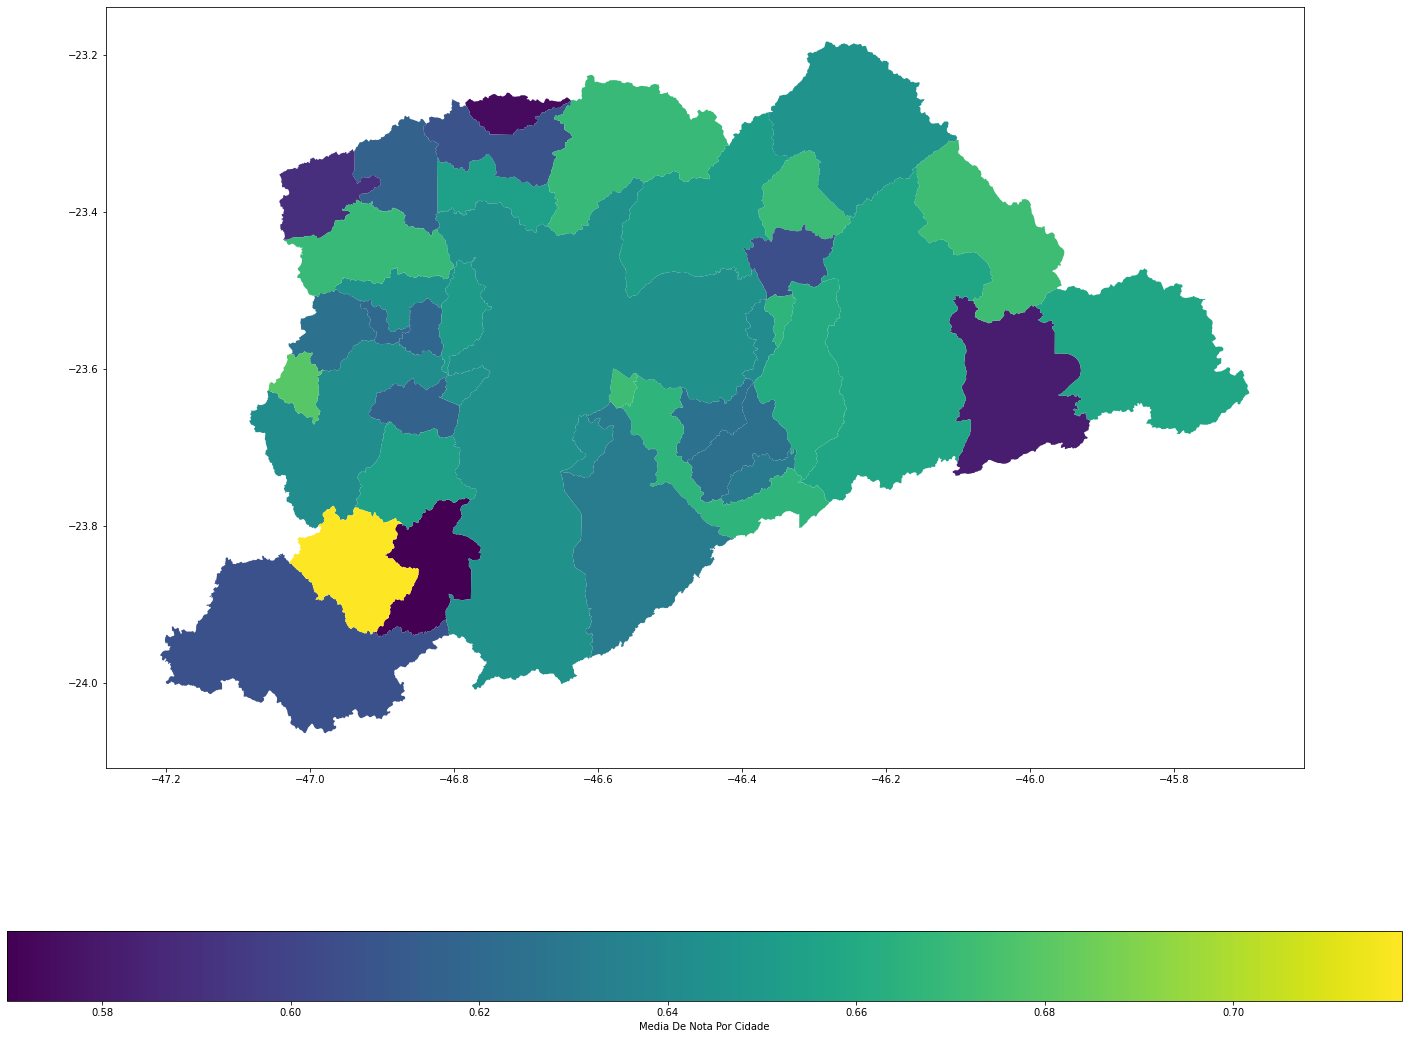

In [ ]:
grafico = regiao_metropolitana.plot(figsize=(25,20),column=regiao_metropolitana['percentual'],legend=True,legend_kwds={'label': "Media De Nota Por Cidade",'orientation': "horizontal"})
#grafico.legend(labels=[lista_municipios_metropolitana])

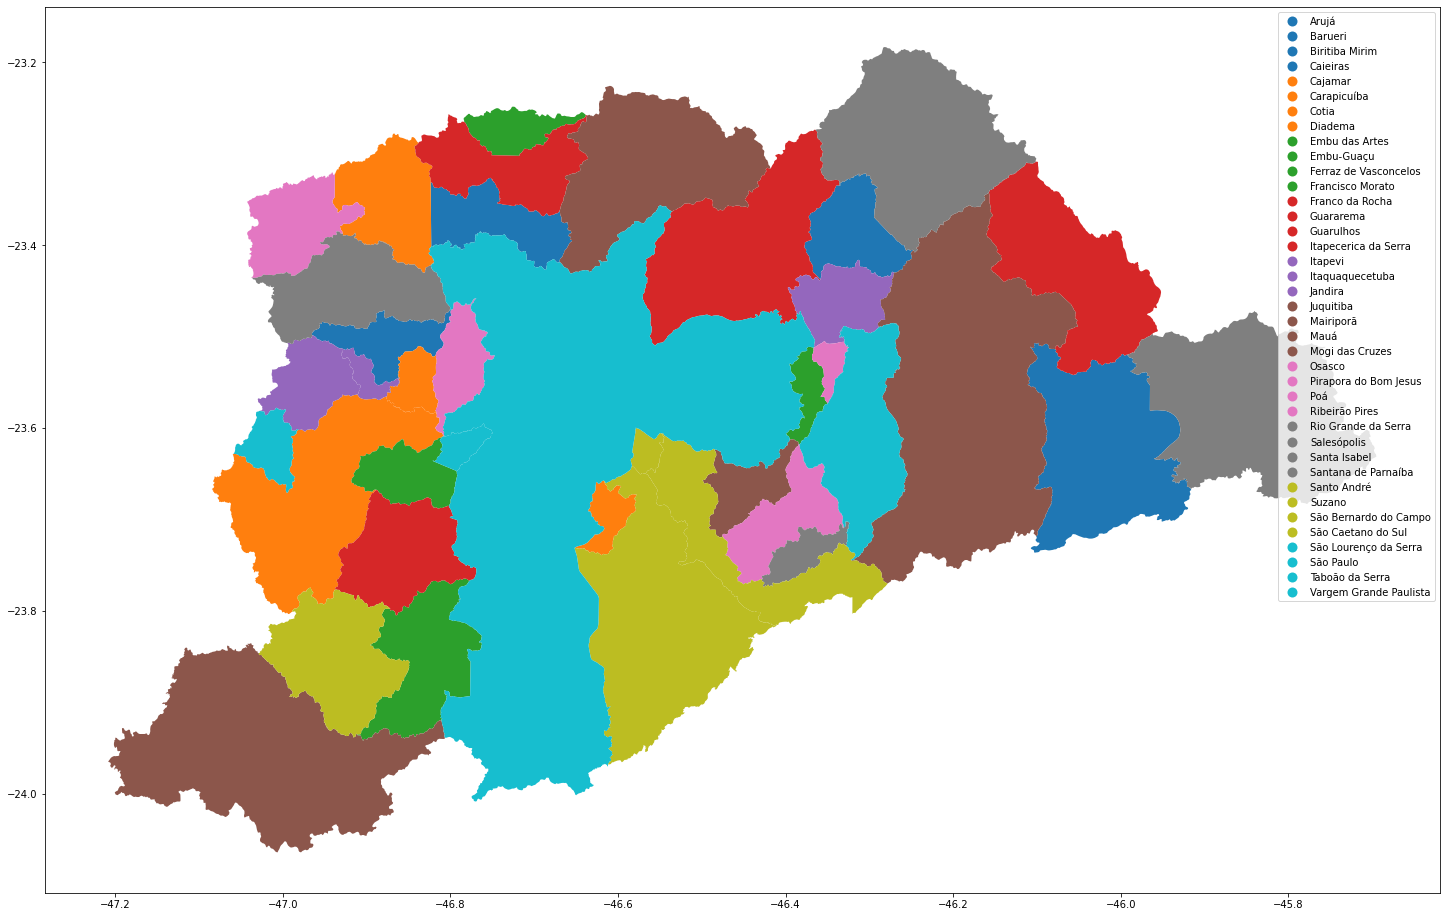

In [ ]:
grafico = regiao_metropolitana.plot(figsize=(25,20),column=regiao_metropolitana['cores'],legend=True)
#grafico.legend(labels=[lista_municipios_metropolitana])

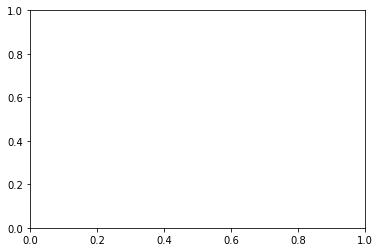

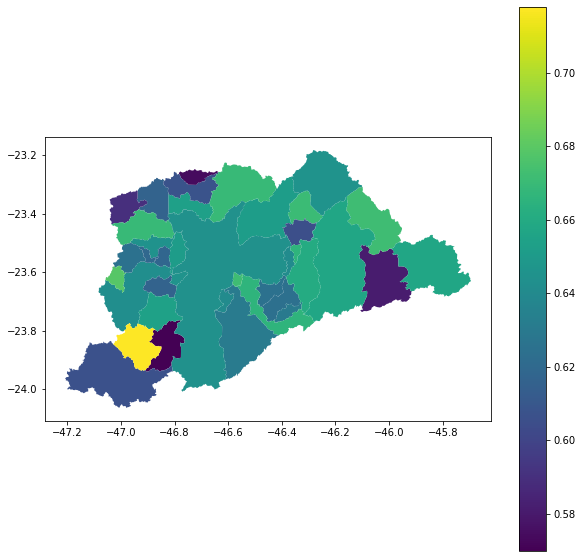

In [ ]:
fig, ax = plt.subplots(1, 1)
regiao_metropolitana.plot(figsize=(10,10),column=regiao_metropolitana['percentual'],legend=True)
#grafico.legend(labels=[lista_municipios_metropolitana])

In [ ]:
pip install contextily

     |████████████████████████████████| 18.3MB 1.2MB/s 


In [ ]:
import contextily as ctx

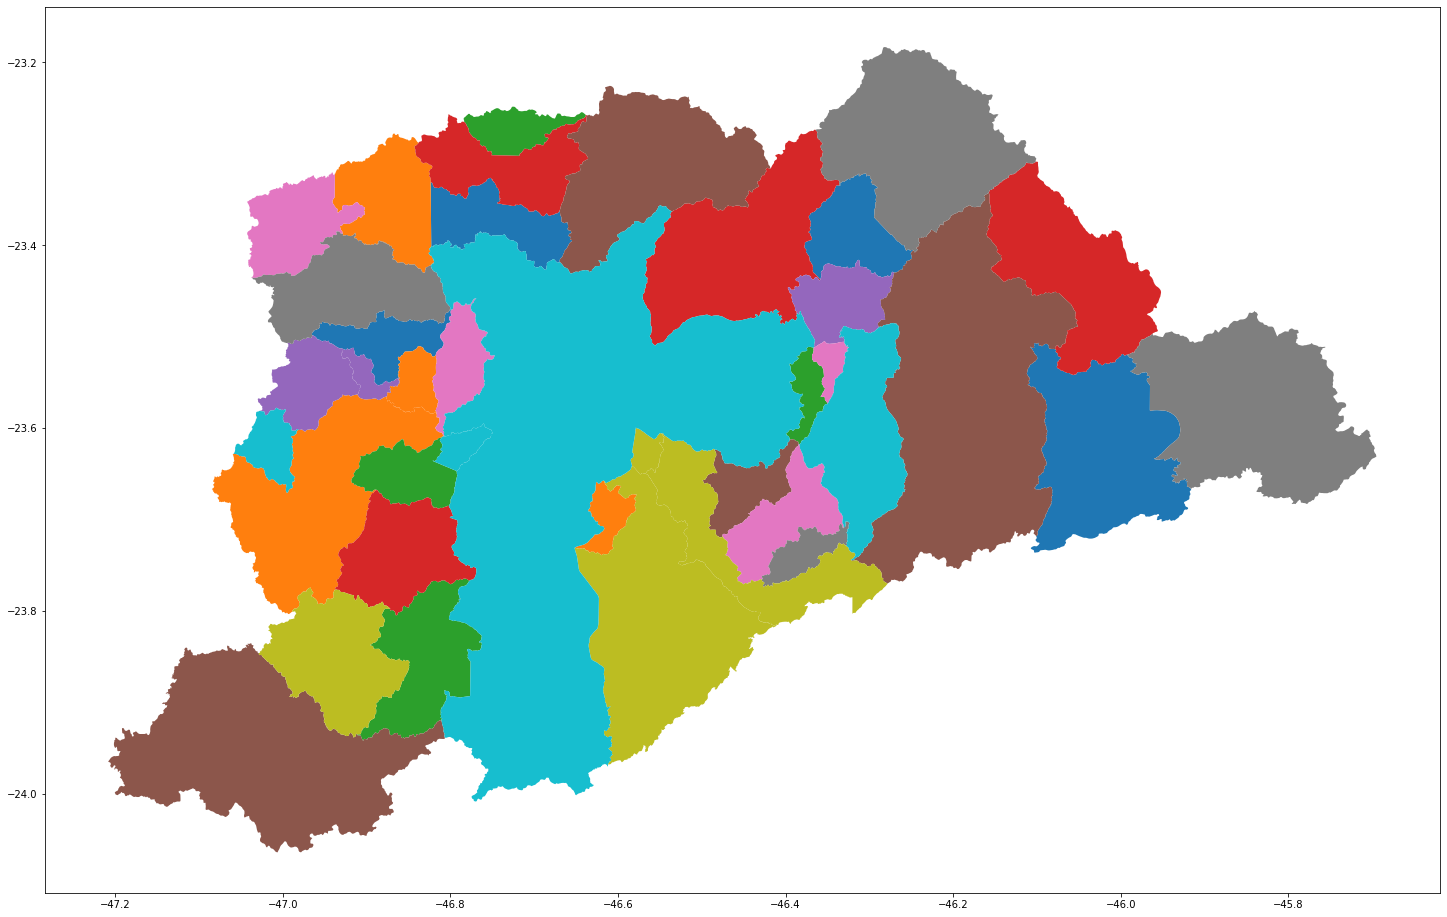

In [ ]:
teste01 = regiao_metropolitana.plot(figsize=(25,20),column=regiao_metropolitana['cores'])


In [ ]:
regiao_metropolitana.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,cores,media,percentual
44,3503901,Arujá,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",Arujá,2683.17838,0.670795
64,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",Barueri,2579.74553,0.644936
74,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",Biritiba Mirim,2323.82500,0.580956
101,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",Caieiras,2614.85789,0.653714
103,3509205,Cajamar,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...",Cajamar,2465.35862,0.616340


In [ ]:
grafico_sp = regiao_metropolitana

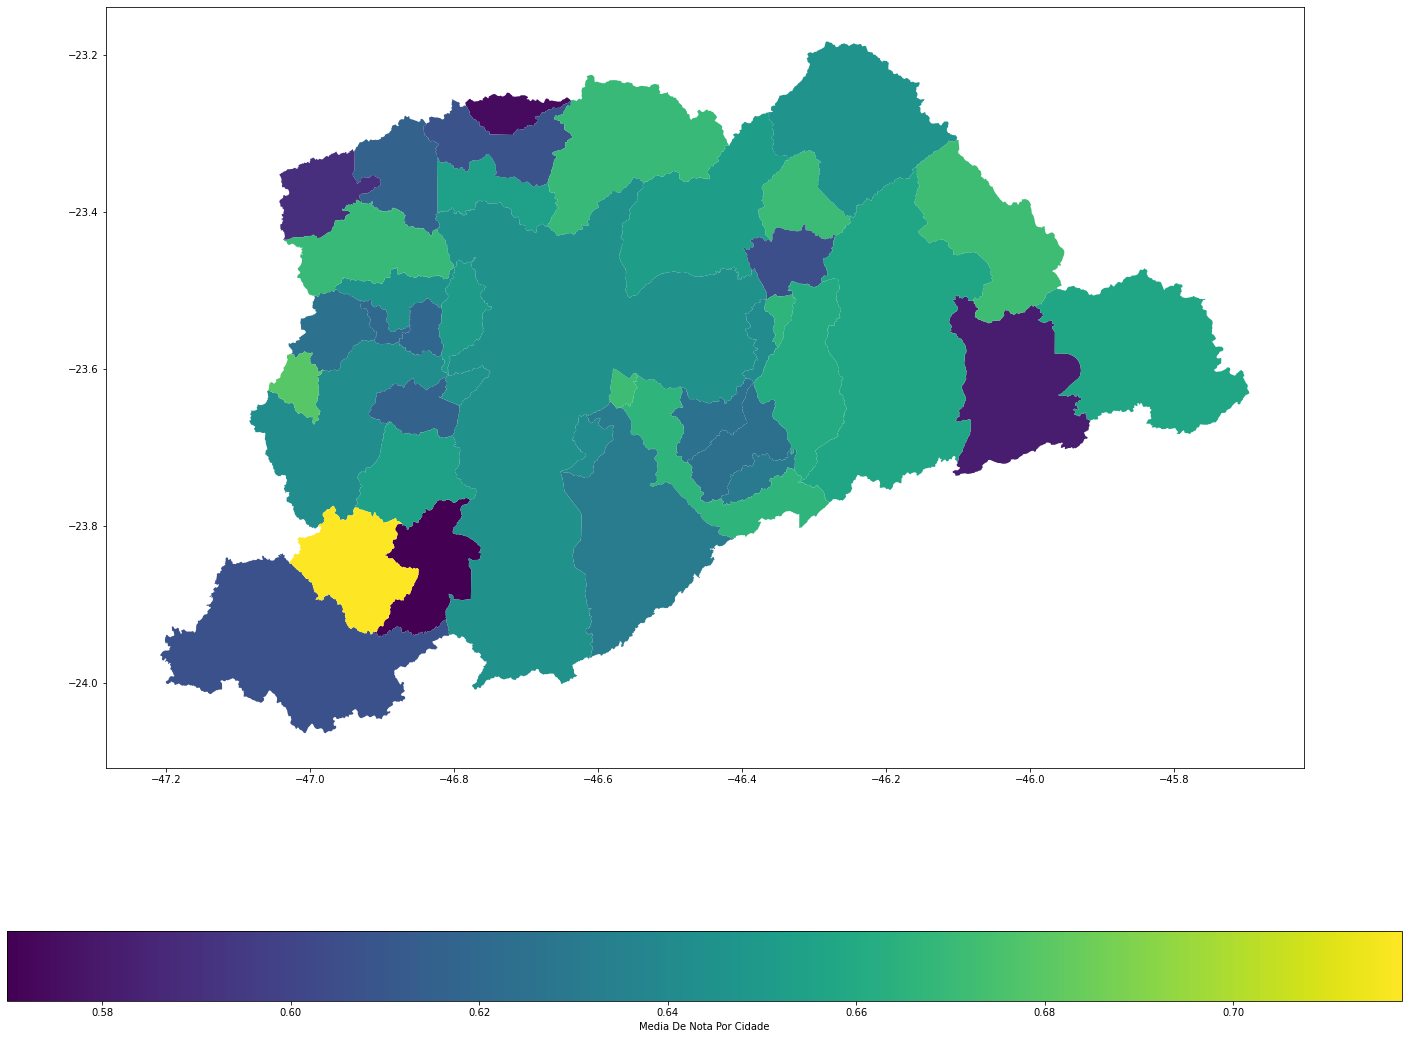

In [ ]:
grafico = regiao_metropolitana.plot(figsize=(25,20),column=regiao_metropolitana['percentual'],legend=True,legend_kwds={'label': "Media De Nota Por Cidade",'orientation': "horizontal"})

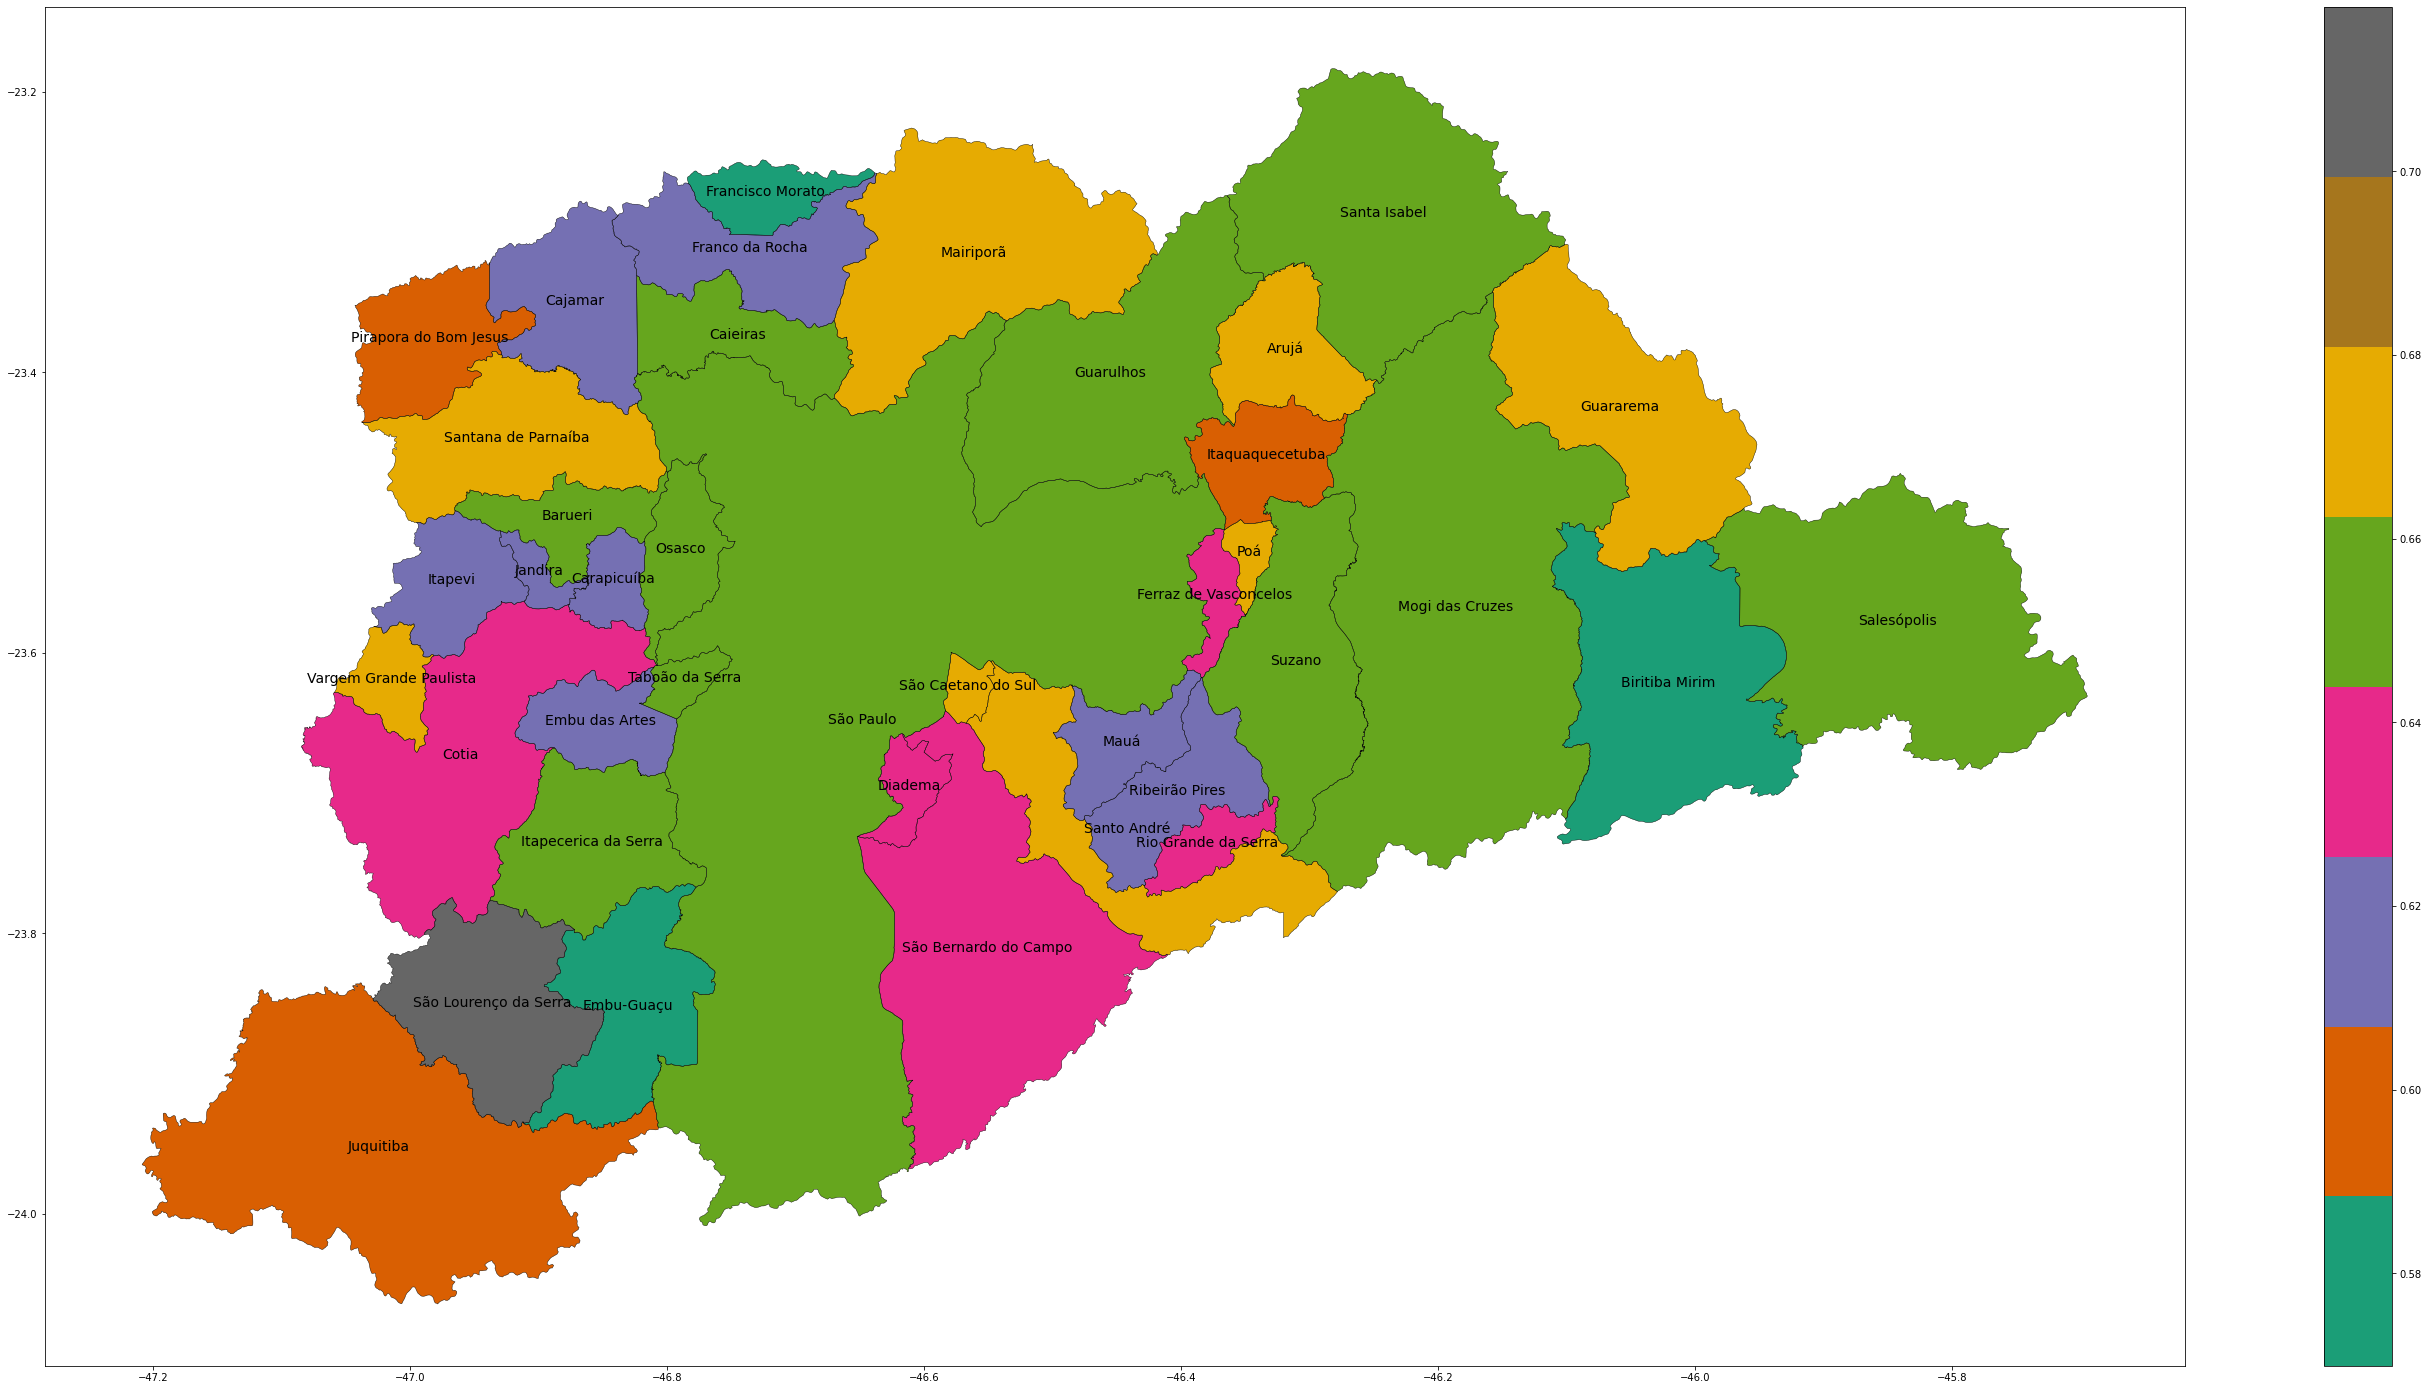

In [ ]:
fig = plt.figure(1, figsize=(50,25)) 
ax = fig.add_subplot()
grafico_sp.apply(lambda x: ax.annotate(s=x.NM_MUN, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
grafico_sp.boundary.plot(ax=ax, color='Black', linewidth=.4)
grafico_sp.plot(ax=ax, cmap='Dark2', figsize=(12, 12),column=regiao_metropolitana['percentual'],legend=True)
#west.plot(figsize=(25,20),column=regiao_metropolitana['percentual'],legend=True,legend_kwds={'label': "Media De Nota Por Cidade",'orientation': "horizontal"})
#ax.text(-0.05, 0.5, 'L', transform=ax.transAxes,
#        fontsize=20, color='gray', alpha=0.5,
#       ha='center', va='center', rotation='90')

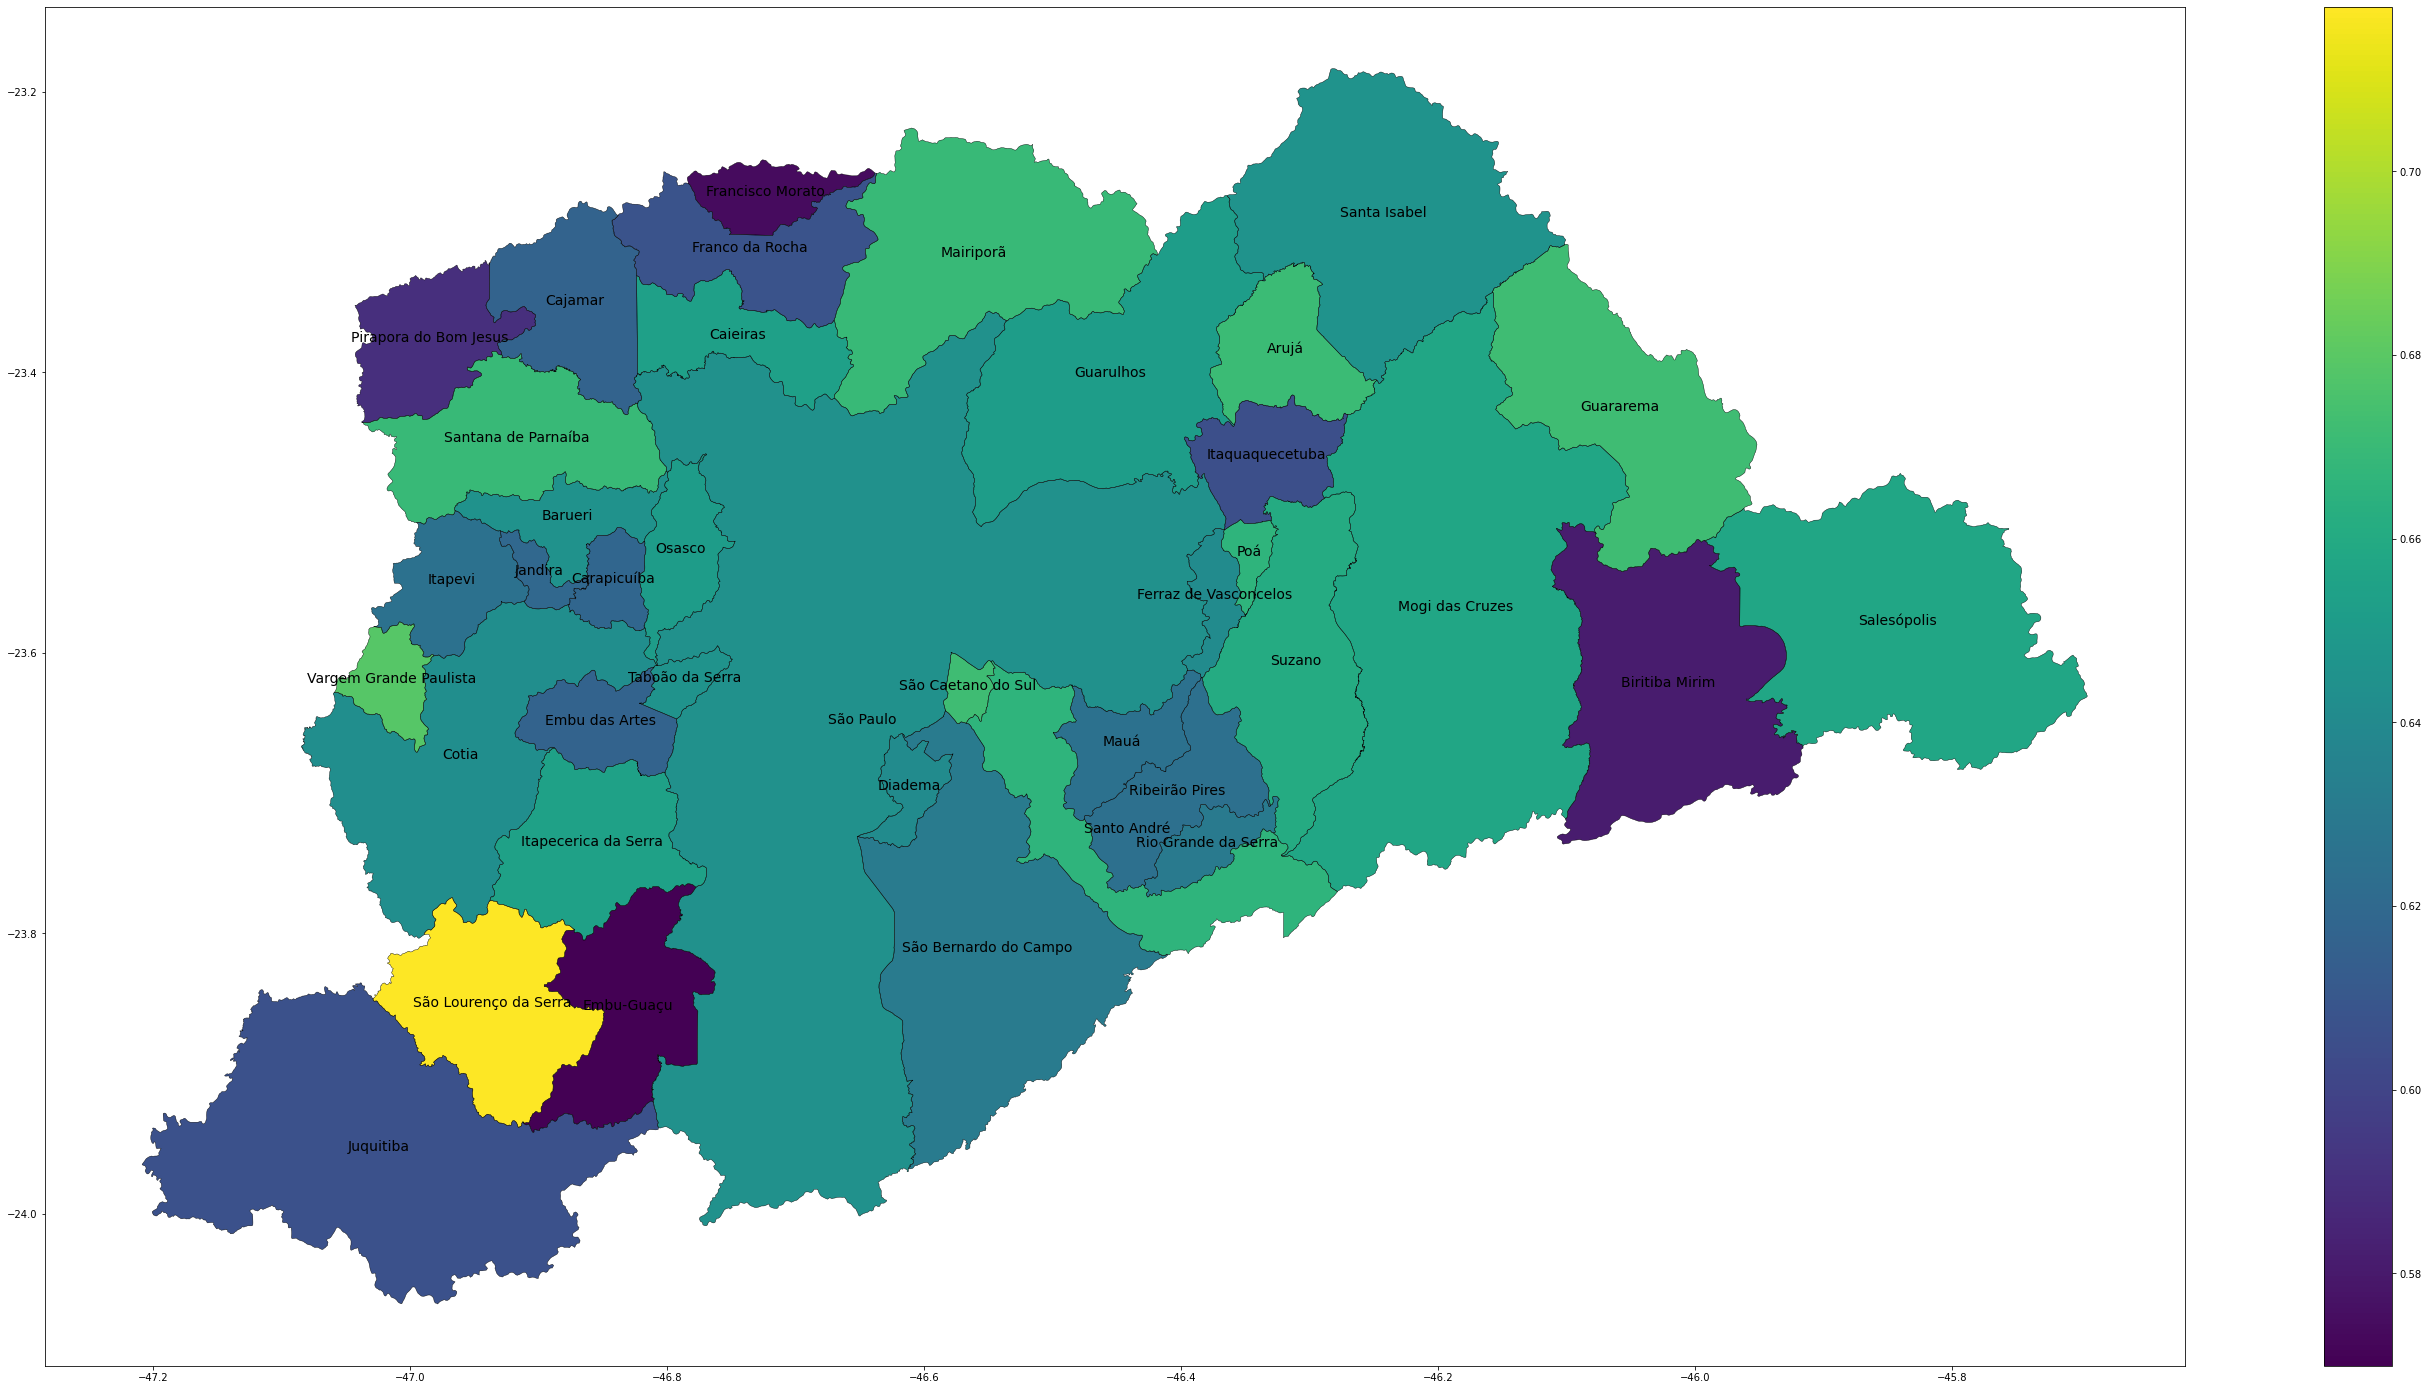

In [ ]:
fig = plt.figure(1, figsize=(50,25)) 
ax = fig.add_subplot()
grafico_sp.apply(lambda x: ax.annotate(s=x.NM_MUN, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
grafico_sp.boundary.plot(ax=ax, color='Black', linewidth=.4)
grafico_sp.plot(ax=ax ,figsize=(12, 12),column=regiao_metropolitana['percentual'],legend=True)
#ax.text(-0.05, 0.5, 'L', transform=ax.transAxes,
#        fontsize=20, color='gray', alpha=0.5,
#       ha='center', va='center', rotation='90')

In [ ]:
regiao_metropolitana.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,cores,media,percentual
44,3503901,Arujá,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...",Arujá,2683.17838,0.670795
64,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5...",Barueri,2579.74553,0.644936
74,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5...",Biritiba Mirim,2323.82500,0.580956
101,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3...",Caieiras,2614.85789,0.653714
103,3509205,Cajamar,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3...",Cajamar,2465.35862,0.616340


In [ ]:
dados_osasco = dados_amostra_sem_zero.query('NO_MUNICIPIO_RESIDENCIA == "São Paulo"')

In [ ]:
dados_osasco.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_TOTAL
12953,190001518551,2019,3550308,São Paulo,35,SP,28,M,1,1,1,3304201.0,Resende,33.0,RJ,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBBAD99999BACCCEEDEDAAADDBECDECDDBABBDDAAECBCC...,AAED*EEAECECDDEBADCBCDEABEDDEBCEBAEBDBEAADEEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,160.0,200.0,180.0,140.0,840.0,E,F,D,D,1,J,A,B,B,A,A,B,A,A,A,B,A,A,A,A,A,B,A,B,B,3604.8
14209,190001570062,2019,3550308,São Paulo,35,SP,17,M,1,3,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBDAD99999BACBDBBEEBDADDDBABAECDACBEBCAAADCDDC...,AAEADEEEBEADEBCBAECBBDBBEBCEABBEDEBBDBDCEACBE,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,120.0,120.0,100.0,100.0,540.0,E,E,B,B,2,E,A,C,C,B,A,C,A,B,A,B,A,B,C,B,B,C,B,B,B,2726.3
14213,190001570128,2019,3550308,São Paulo,35,SP,21,F,1,2,1,3205309.0,Vitória,32.0,ES,2,0,2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ACDADBCBBBBAADCDACECBECDEDDECCBEBDAADEEBD...,DCCCDDECCCBCBEAACCDDECCBBACDCBCCAABBCCCECDBCD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,140.0,120.0,120.0,120.0,620.0,H,B,B,A,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2631.1
14242,190001571393,2019,3550308,São Paulo,35,SP,20,F,1,3,1,3550308.0,São Paulo,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DBACE99999DCEABDDCAEDACECEBCECEAECABABDACDCBBC...,EACDCBEBDABCADCBADBDEDCEDABCEBBCEDABDEBCDDABE,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,120.0,140.0,120.0,140.0,680.0,C,C,C,B,4,D,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,D,B,B,B,2684.1
14243,190001571439,2019,3550308,São Paulo,35,SP,19,F,1,1,1,3550308.0,São Paulo,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABAAD99999EEABCDEDCBDAADCBBBAEABDAEDAAAACDDCCC...,DACDDAABCBBBABCAADEBAEBDADBBCBCEECEABEEDCEDAC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,100.0,120.0,120.0,580.0,H,A,F,B,8,E,A,B,C,B,A,B,A,B,A,B,A,A,B,B,B,D,B,B,B,2689.5


In [ ]:
categorias_sociais = ['B', 'A', 'J', 'E', 'C', 'M', 'D', 'I', 'N', 'F', 'H', 'O', 'Q',
       'G', 'K', 'P', 'L']
categorias_sociais.sort()

In [ ]:
classe_social_numerado = {}
for posi, i in enumerate(categorias_sociais):
  sujo = (posi+1)/17
  classe_social_numerado[i] = f'{sujo:.2f}'

In [ ]:
dados_metropole = sp.query(f'NO_MUNICIPIO_RESIDENCIA in {lista_municipios_metropolitana}')

In [ ]:
dados_metropole

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_TOTAL
12953,190001518551,2019,3550308,São Paulo,35,SP,28,M,1,1,1,3304201.0,Resende,33.0,RJ,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBBAD99999BACCCEEDEDAAADDBECDECDDBABBDDAAECBCC...,AAED*EEAECECDDEBADCBCDEABEDDEBCEBAEBDBEAADEEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,160.0,200.0,180.0,140.0,840.0,E,F,D,D,1,J,A,B,B,A,A,B,A,A,A,B,A,A,A,A,A,B,A,B,B,3604.8
14209,190001570062,2019,3550308,São Paulo,35,SP,17,M,1,3,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBDAD99999BACBDBBEEBDADDDBABAECDACBEBCAAADCDDC...,AAEADEEEBEADEBCBAECBBDBBEBCEABBEDEBBDBDCEACBE,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,120.0,120.0,100.0,100.0,540.0,E,E,B,B,2,E,A,C,C,B,A,C,A,B,A,B,A,B,C,B,B,C,B,B,B,2726.3
14210,190001570078,2019,3523107,Itaquaquecetuba,35,SP,22,M,1,3,1,3523107.0,Itaquaquecetuba,35.0,SP,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDBAB99999BDCCCBCAAADCABBCCDAEBBABEDBBCCBDBBBB...,CABBCBDAAECBACCDADEBBCCCABBABCCDCBDBCDECCDDDD,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,40.0,40.0,100.0,0.0,300.0,A,E,C,F,1,C,A,B,B,A,A,B,B,B,B,A,A,A,B,B,A,B,A,B,B,2161.7
14213,190001570128,2019,3550308,São Paulo,35,SP,21,F,1,2,1,3205309.0,Vitória,32.0,ES,2,0,2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ACDADBCBBBBAADCDACECBECDEDDECCBEBDAADEEBD...,DCCCDDECCCBCBEAACCDDECCBBACDCBCCAABBCCCECDBCD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,140.0,120.0,120.0,120.0,620.0,H,B,B,A,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2631.1
14242,190001571393,2019,3550308,São Paulo,35,SP,20,F,1,3,1,3550308.0,São Paulo,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DBACE99999DCEABDDCAEDACECEBCECEAECABABDACDCBBC...,EACDCBEBDABCADCBADBDEDCEDABCEBBCEDABDEBCDDABE,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,120.0,140.0,120.0,140.0,680.0,C,C,C,B,4,D,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,D,B,B,B,2684.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
teste_dados_metropole = dados_metropole[:]

In [ ]:
dicionario_teste = {}
lista_teste = []
for pose, e in enumerate(categorias_sociais):
  for posi, i in enumerate(lista_municipios_metropolitana):
    pesquisa_cidade = teste_dados_metropole.query(f'NO_MUNICIPIO_RESIDENCIA == "{i}"')
    if len(pesquisa_cidade) > 0:
      pesquisa_social = pesquisa_cidade.query(f'Q006 == "{e}"')
      soma_pesquisa = len(pesquisa_social)
      lista_teste.append(soma_pesquisa)
  dicionario_teste[i] = lista_teste[:]
  lista_teste.clear


In [ ]:
dicionario_teste = {}
lista_teste = []
for posi, i in enumerate(lista_municipios_metropolitana):
  pesquisa_cidade = teste_dados_metropole.query(f'NO_MUNICIPIO_RESIDENCIA == "{i}"')
  for pose, e in enumerate(categorias_sociais):
    if len(pesquisa_cidade) > 0:
      pesquisa_social = pesquisa_cidade.query(f'Q006 == "{e}"')
      soma_pesquisa = len(pesquisa_social)
      lista_teste.append(soma_pesquisa)
  dicionario_teste[i] = lista_teste[:]
  lista_teste.clear()


In [ ]:
dicionario_teste

{'Arujá': [0, 7, 4, 4, 7, 0, 4, 3, 4, 2, 0, 0, 0, 0, 1, 1, 0],
 'Barueri': [1, 14, 34, 12, 17, 8, 10, 7, 5, 0, 2, 5, 1, 3, 3, 0, 1],
 'Biritiba Mirim': [0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Caieiras': [2, 2, 8, 2, 3, 1, 6, 4, 2, 2, 0, 1, 2, 1, 1, 0, 1],
 'Cajamar': [0, 2, 6, 3, 4, 1, 3, 5, 2, 0, 0, 0, 1, 1, 0, 1, 0],
 'Carapicuíba': [5, 19, 45, 17, 20, 14, 10, 7, 4, 1, 0, 0, 2, 0, 1, 2, 2],
 'Cotia': [0, 7, 28, 11, 15, 14, 9, 3, 5, 3, 1, 1, 3, 2, 0, 1, 1],
 'Diadema': [4, 13, 47, 20, 24, 11, 22, 15, 6, 2, 0, 0, 2, 0, 1, 0, 0],
 'Embu das Artes': [3, 11, 38, 13, 14, 7, 5, 4, 2, 3, 1, 0, 1, 0, 0, 0, 0],
 'Embu-Guaçu': [2, 4, 7, 3, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0],
 'Ferraz de Vasconcelos': [1, 6, 17, 9, 9, 9, 3, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'Francisco Morato': [3, 10, 32, 4, 7, 3, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'Franco da Rocha': [2, 6, 12, 2, 11, 1, 4, 5, 3, 0, 0, 1, 0, 0, 0, 0, 0],
 'Guararema': [1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 'Guarul

In [ ]:
teste07 = teste_dados_metropole.query('Q006 == "C"')

In [ ]:
sum(lista_teste)

182

In [ ]:
classe_social_numerado

{'A': '0.06',
 'B': '0.12',
 'C': '0.18',
 'D': '0.24',
 'E': '0.29',
 'F': '0.35',
 'G': '0.41',
 'H': '0.47',
 'I': '0.53',
 'J': '0.59',
 'K': '0.65',
 'L': '0.71',
 'M': '0.76',
 'N': '0.82',
 'O': '0.88',
 'P': '0.94',
 'Q': '1.00'}

## Conclusão

### Texto

Segundo as Informações levantadas e os mapas de calor refente a grande São Paulo com os dados aplicados vemos que existem alguns municipios que concentram as notas, porem elas estão bem espalhadas ao todo, o que se contradiz com o grafico sccater, onde vemos claramente uma concentração de notas na Renda Media / Alta, porem uma grande concentração de pessoas de baixa renda nas notas mais baixas, o que colocado lado a lado o scatter e o mapa de são paulo podemos chegar a conclusão que as notas medias são sempre com um desvio padrão parecido pois em todas as cidades existem mais pessoas pobres, o que segundo o scatter tendem a ter uma nota menor equilibrando as médias.

### Gráficos Citados

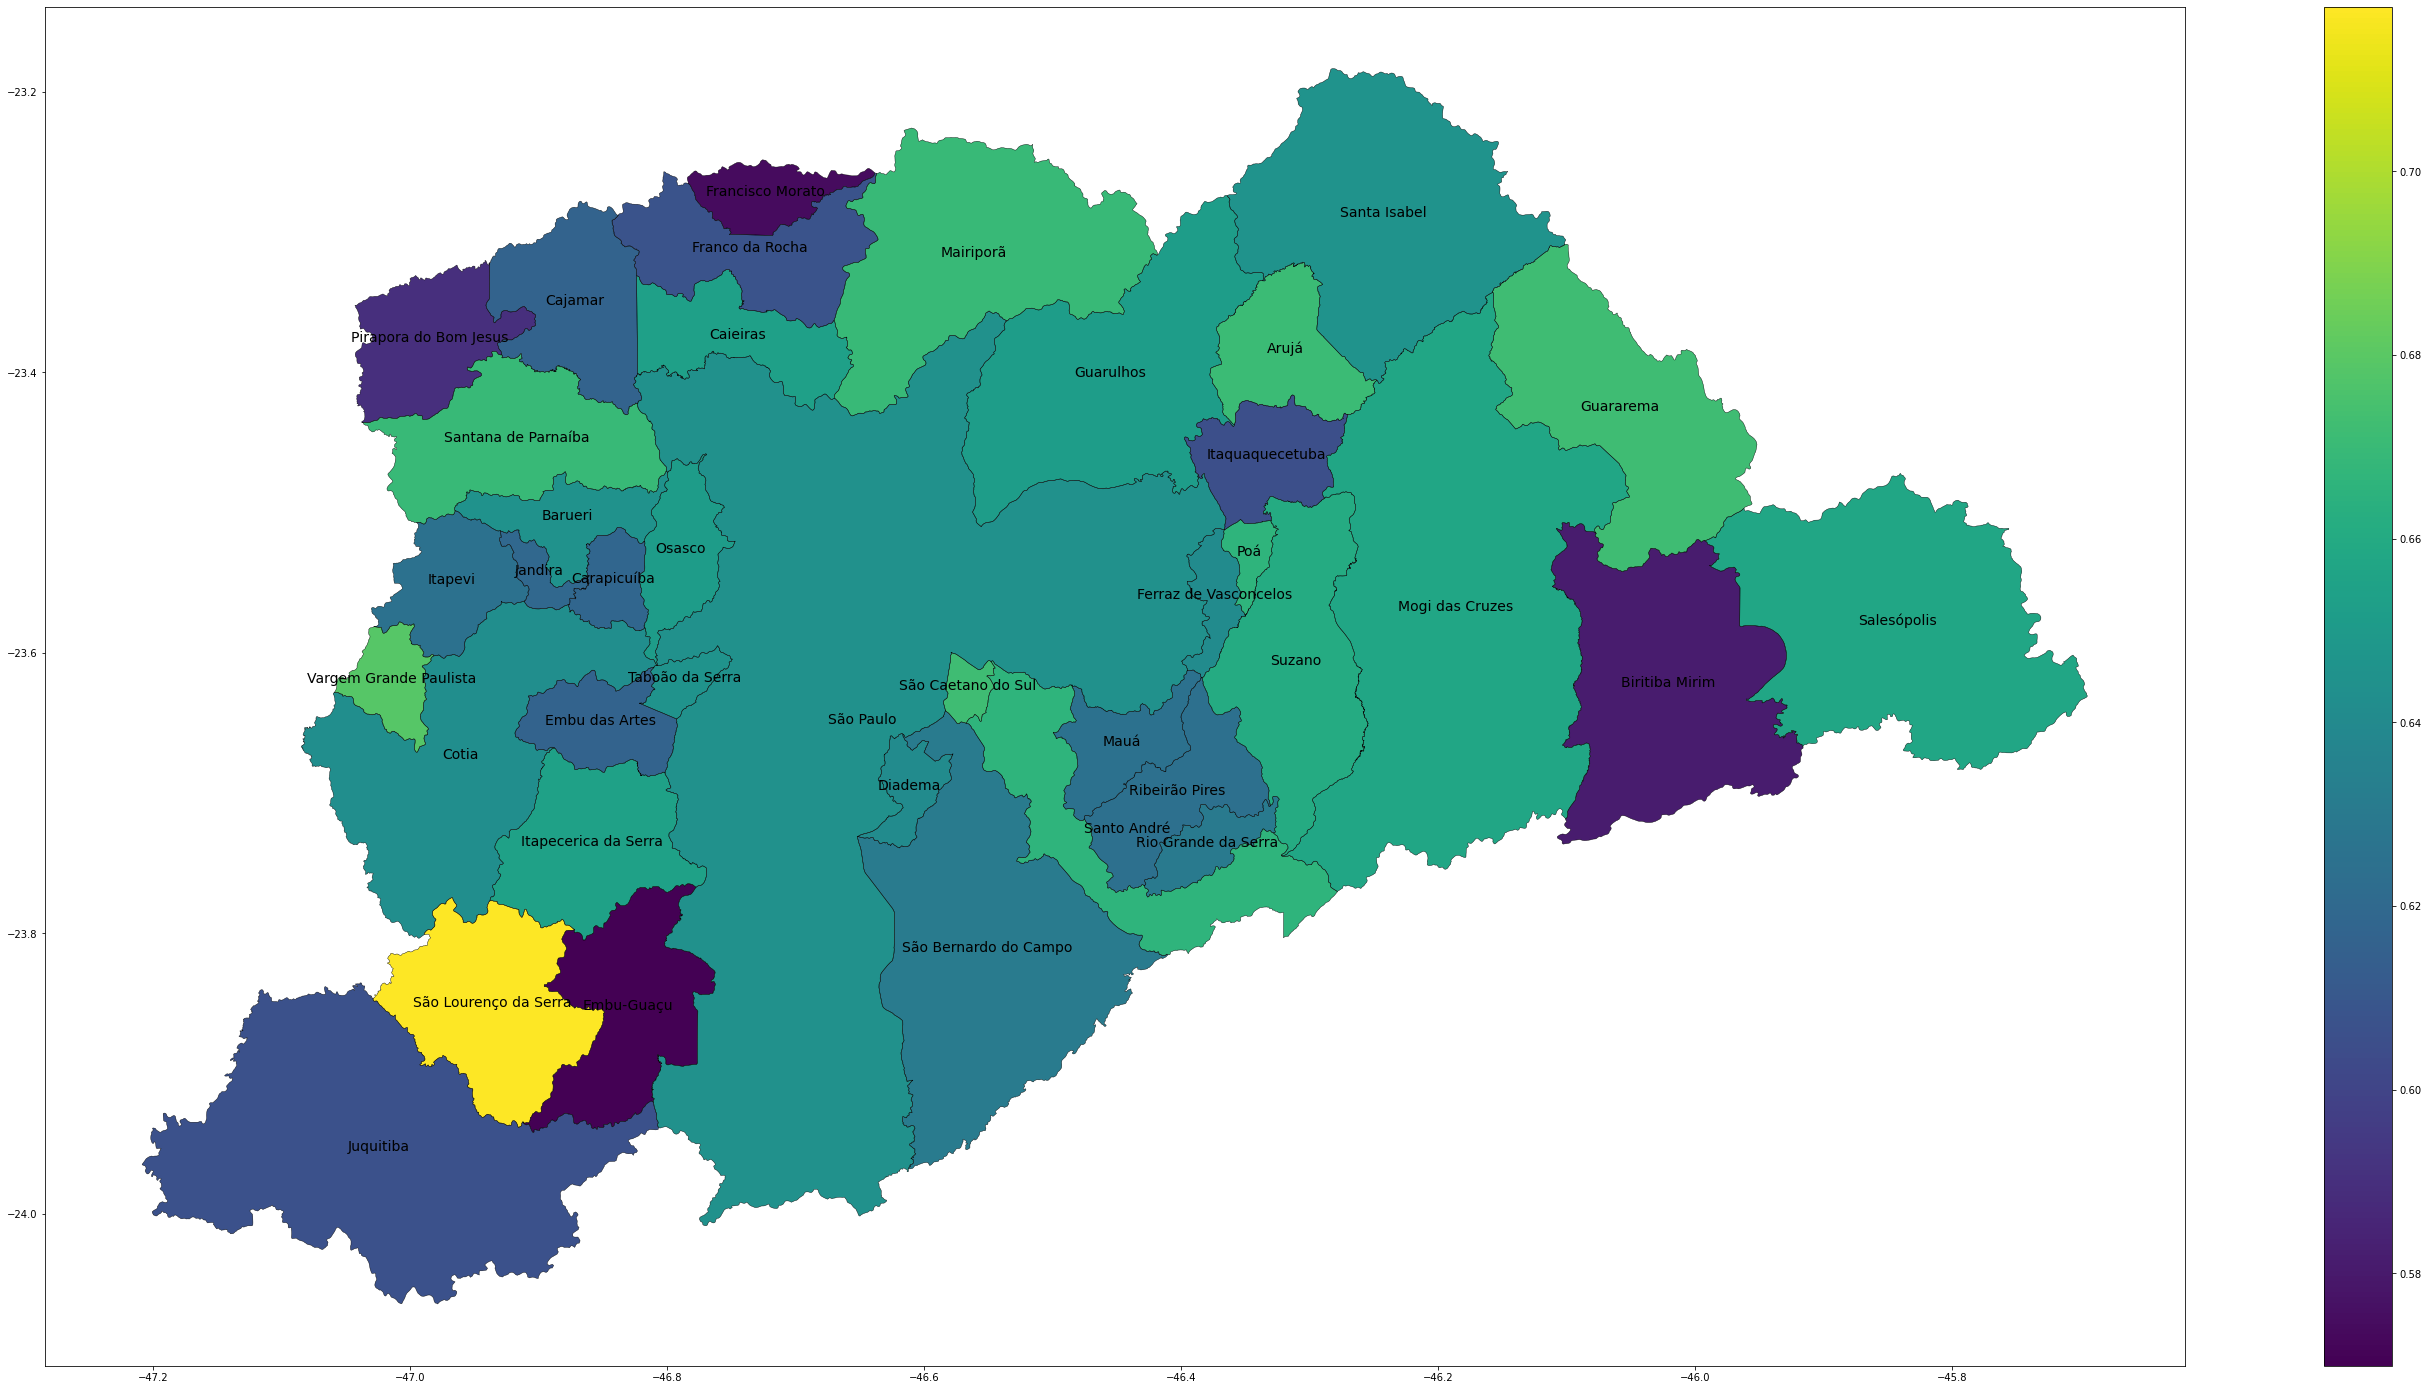

In [ ]:
fig = plt.figure(1, figsize=(50,25)) 
ax = fig.add_subplot()
grafico_sp.apply(lambda x: ax.annotate(s=x.NM_MUN, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
grafico_sp.boundary.plot(ax=ax, color='Black', linewidth=.4)
grafico_sp.plot(ax=ax ,figsize=(12, 12),column=regiao_metropolitana['percentual'],legend=True)
#ax.text(-0.05, 0.5, 'L', transform=ax.transAxes,
#        fontsize=20, color='gray', alpha=0.5,
#       ha='center', va='center', rotation='90')

(300.0, 1050.0)

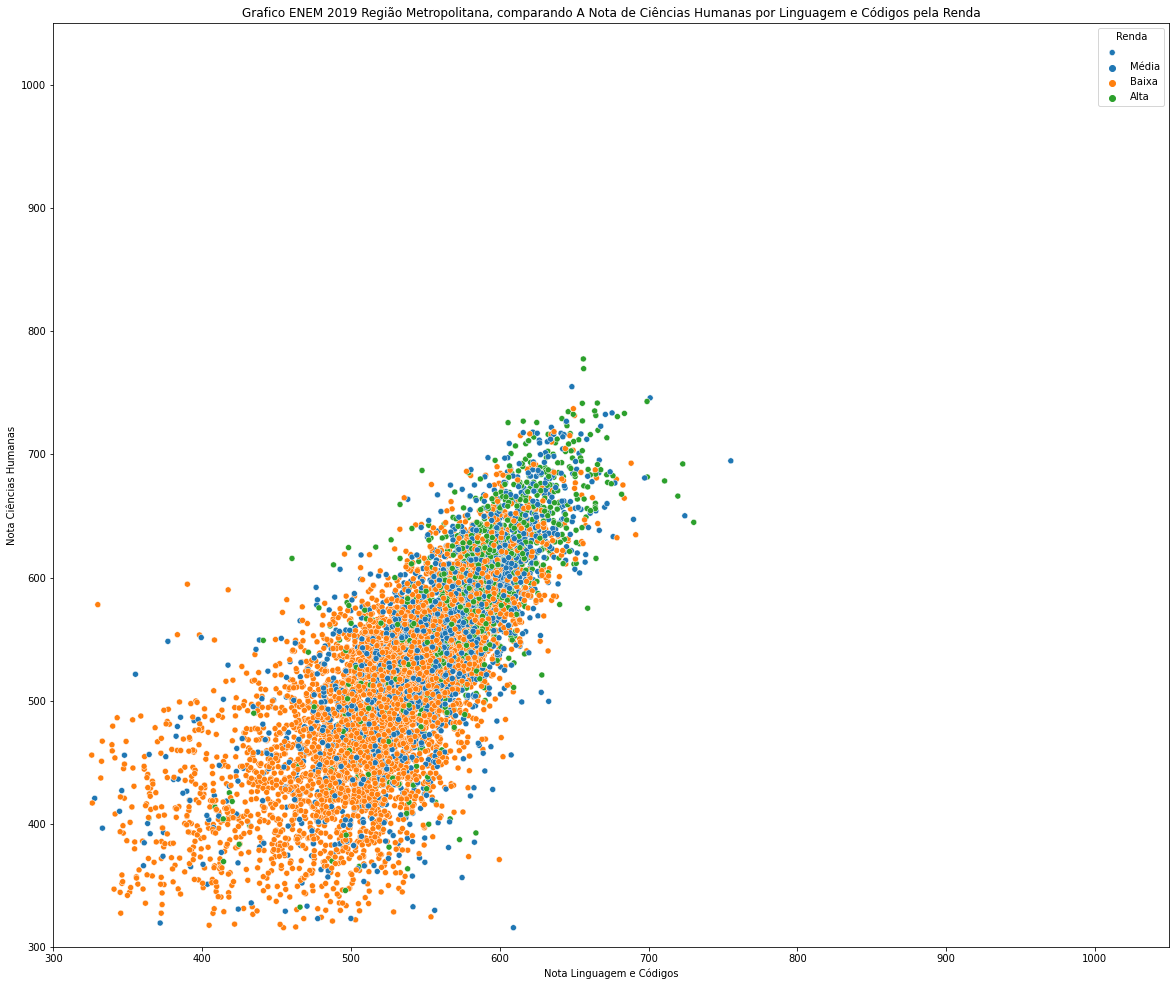

In [ ]:
plt.figure(figsize=(20,17))
plt.title('Grafico ENEM 2019 Região Metropolitana, comparando A Nota de Ciências Humanas por Linguagem e Códigos pela Renda')
grafico_scatter = sns.scatterplot(data=copia_sp,x='NU_NOTA_LC',y='NU_NOTA_CH',hue='Q006')
grafico_scatter.legend(labels=('','Média','Baixa','Alta'),title='Renda')
grafico_scatter.set_xlabel('Nota Linguagem e Códigos')
grafico_scatter.set_ylabel('Nota Ciências Humanas')
plt.ylim(300,1050)
plt.xlim(300,1050)

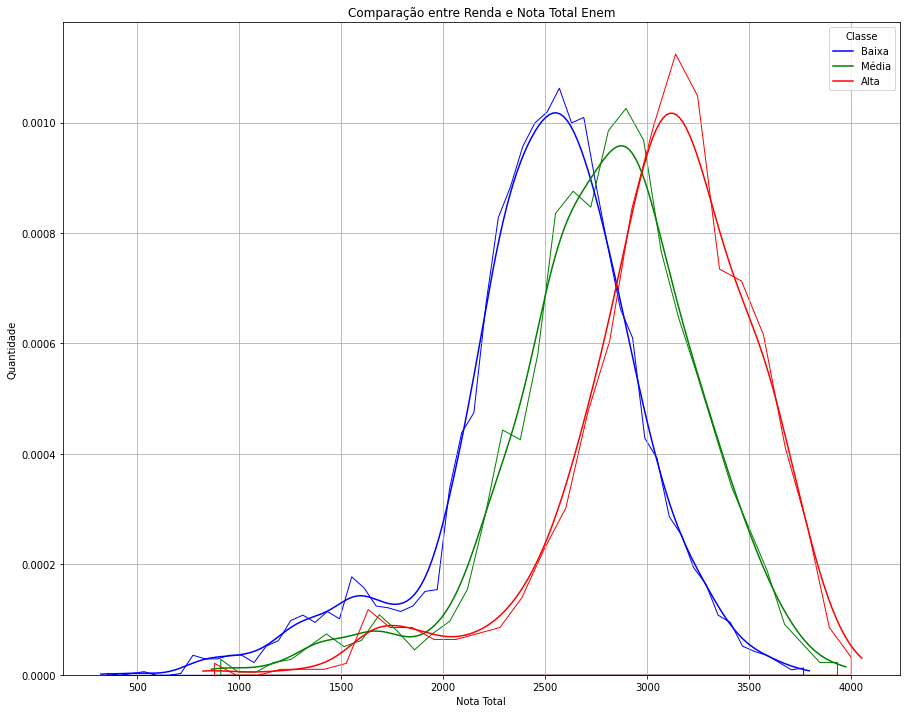

In [ ]:
plt.figure(figsize=(15,12))
plt.grid(b)
plt.title('Comparação entre Renda e Nota Total Enem')
sns.histplot(data=sp_baixa,x='NOTA_TOTAL',kde=True,color='blue',alpha=0,stat='density',element="poly")
sns.histplot(data=sp_media,x='NOTA_TOTAL',kde=True,color='green',alpha=0,stat='density',element="poly")
grafico_diferenca = sns.histplot(data=sp_alta,x='NOTA_TOTAL',kde=True,color='red',alpha=0,stat='density',element="poly")
grafico_diferenca.set_xlabel('Nota Total')
grafico_diferenca.set_ylabel('Quantidade')
grafico_diferenca.legend(labels=('Baixa','Média','Alta'),title='Classe')